# 10 Import Excel file creating standard date variable

This Jupyter notebook will expand on the topic covered by previous one. After importing Excel file into Python, I will create a new variable as standard Python date variable from a character variable

## 1. Import Excel data into Python

- Import required libraries

In [6]:
import pandas as pd
import os
import numpy as np 


In [7]:
import matplotlib.pyplot as plt
import math

In [ ]:
# Seaborn module installed alongside darkgrid theme
import seaborn as sns
sns.set_theme(style = "darkgrid")

In [10]:
wd = os.getcwd()
print(f'My working directory is:{wd}')

My working directory is:/home/pablo/Documents/Pablo_ubuntu/Python_github_projects/ML-using-Python/data_wrangling_scripts


In [12]:
project_folder = os.path.join('/home','pablo','Documents','Pablo_ubuntu','Python_github_projects','ML-using-Python')
os.chdir(project_folder)

In [13]:
data_folder = os.path.join('/home','pablo','Documents','Pablo_ubuntu','Python_github_projects','ML-using-Python','data')

In [14]:
print(f'Data fodler path:{project_folder}')
print(f'Data fodler path:{data_folder}')

Data fodler path:/home/pablo/Documents/Pablo_ubuntu/Python_github_projects/ML-using-Python
Data fodler path:/home/pablo/Documents/Pablo_ubuntu/Python_github_projects/ML-using-Python/data


- Display data folder contents

In [15]:
data_folder_contents = os.listdir(data_folder)
print(f'Data folder contents:{data_folder_contents}')

Data folder contents:['monthly-milk-production-pounds.csv', 'winequality-white.csv', 'Monthly-AE-Time-Series-March-2025.xls', 'ONS_long_term_immigration_end2024.xlsx', 'AE_Attendances_TypeI_2010_2025.csv', '03_INE_Spain_natural_growh_births_deaths.xlsx', 'winequality-red.csv', 'INE Resident population country of birth Spain.xlsx', 'ONS_Figure_01_Long_term_emigration_immigration_net_migration.xlsx', 'Monthly-AE-Time-Series-January-2024.xls', 'wine_quality.zip', 'OCDE_countries_population_figures_1970_2022.csv', 'AE_Time_Series_Data_website.txt', '01 INE resident population by nationality Spain and CV 2002 2024.xlsx', 'AE_Attendances_2010_2024.csv', 'INE total and foreign population figures Spain.xlsx', 'Type_I_ATT_TEST.csv', 'all_wine_reset.csv', 'winequality.names', 'AE_Attendances_Aug2010_Mar_2025.csv', '02 INE Spain CV population stocks and flows 2002 2025.xlsx', 'Type_I_ATT_TRAIN.csv', 'ONS_Figure_2__Population_increase_in_mid-2023_was_driven_mostly_by_net_international_migration.xl

- Display just Files ending in .xlsx in our data_folder path

In [16]:
for file in os.listdir(data_folder):
    if file.endswith(".xlsx"):
        print(os.path.join("/data", file))

/data/ONS_long_term_immigration_end2024.xlsx
/data/03_INE_Spain_natural_growh_births_deaths.xlsx
/data/INE Resident population country of birth Spain.xlsx
/data/ONS_Figure_01_Long_term_emigration_immigration_net_migration.xlsx
/data/01 INE resident population by nationality Spain and CV 2002 2024.xlsx
/data/INE total and foreign population figures Spain.xlsx
/data/02 INE Spain CV population stocks and flows 2002 2025.xlsx


- Importing Excel file "INE total and foreign population figures Spain.xlsx" from \data sub-folder.

In [18]:
data_raw = pd.read_excel(os.path.join('data','INE total and foreign population figures Spain.xlsx'),
                         sheet_name = 'INE_Total_population',
                         skiprows = 7, 
                         usecols='A:B',
                         nrows = 212)
data_raw.head()

,,Total
0,1 de enero de 2024,48619695
1,1 de octubre de 2023,48486865
2,1 de julio de 2023,48320520
3,1 de abril de 2023,48205962
4,1 de enero de 2023,48085361


In [19]:
data_raw.info

<bound method DataFrame.info of                               Total
0      1 de enero de 2024  48619695
1    1 de octubre de 2023  48486865
2      1 de julio de 2023  48320520
3      1 de abril de 2023  48205962
4      1 de enero de 2023  48085361
..                    ...       ...
207    1 de abril de 1972          
208    1 de enero de 1972  34408338
209  1 de octubre de 1971          
210    1 de julio de 1971  34216856
211    1 de abril de 1971          

[212 rows x 2 columns]>

In [20]:
data_raw.head()
print(data_raw)

                              Total
0      1 de enero de 2024  48619695
1    1 de octubre de 2023  48486865
2      1 de julio de 2023  48320520
3      1 de abril de 2023  48205962
4      1 de enero de 2023  48085361
..                    ...       ...
207    1 de abril de 1972          
208    1 de enero de 1972  34408338
209  1 de octubre de 1971          
210    1 de julio de 1971  34216856
211    1 de abril de 1971          

[212 rows x 2 columns]


In [21]:
data_raw.columns

Index([' ', 'Total'], dtype='object')

- Rename default column names from imported Excel file into Python

In [22]:
data_raw.columns = ['Year','Total_population']
data_raw.head()

,Year,Total_population
0,1 de enero de 2024,48619695
1,1 de octubre de 2023,48486865
2,1 de julio de 2023,48320520
3,1 de abril de 2023,48205962
4,1 de enero de 2023,48085361


In [23]:
data_raw.tail()

,Year,Total_population
207,1 de abril de 1972,
208,1 de enero de 1972,34408338
209,1 de octubre de 1971,
210,1 de julio de 1971,34216856
211,1 de abril de 1971,


### 1. Remove NaN values from Dataframe

- First issue I need to tacke is that we don't have NaN values. We have Empty values in the bottom cells in Total_population column, from the original Excel file imported into Python 

In [24]:
count_data_raw = data_raw.shape[0]  # Gives number of rows
print(count_data_raw)

212


In [26]:
imported_data_na = data_raw.replace(r'^\s*$',np.nan, regex = True)
print(imported_data_na)

                     Year  Total_population
0      1 de enero de 2024        48619695.0
1    1 de octubre de 2023        48486865.0
2      1 de julio de 2023        48320520.0
3      1 de abril de 2023        48205962.0
4      1 de enero de 2023        48085361.0
..                    ...               ...
207    1 de abril de 1972               NaN
208    1 de enero de 1972        34408338.0
209  1 de octubre de 1971               NaN
210    1 de julio de 1971        34216856.0
211    1 de abril de 1971               NaN

[212 rows x 2 columns]


/tmp/ipykernel_5324/580462554.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  imported_data_na = data_raw.replace(r'^\s*$',np.nan, regex = True)


- Now that we have our data with Missing values in the "Total_population" column, I can use the .dropna() method

In [27]:
imported_data_clean_dropna = imported_data_na.dropna(axis = 0, 
                subset = ['Total_population'],
                inplace = False)
imported_data_clean_dropna.head()
imported_data_clean_dropna.tail()    

,Year,Total_population
202,1 de julio de 1973,34980317.0
204,1 de enero de 1973,34800600.0
206,1 de julio de 1972,34595886.0
208,1 de enero de 1972,34408338.0
210,1 de julio de 1971,34216856.0


In [28]:
count_row_clean_test = imported_data_clean_dropna.shape[0]  # Gives number of rows
print(count_row_clean_test)

112


## 2. Flag January rows to keep just those rows 

As I used in previous script "09 Import Excel file replacing blanks by nulls.ipynb" this is the way I flag January (Enero) rows in the dataframe.

In [29]:
imported_data_flag = imported_data_clean_dropna.copy()

In [30]:
imported_data_flag.loc[imported_data_flag['Year'].str.contains('enero',case = False),'Jan_flag'] = 'Y'

In [31]:
imported_data_flag.head()

,Year,Total_population,Jan_flag
0,1 de enero de 2024,48619695.0,Y
1,1 de octubre de 2023,48486865.0,NaN
2,1 de julio de 2023,48320520.0,NaN
3,1 de abril de 2023,48205962.0,NaN
4,1 de enero de 2023,48085361.0,Y


### 2.1 Then we can subset rows with 'Y' Flag in them 

From the imported_data_flag dataframe we will keep just records with Y values in Jan_flag column: 

In [32]:
final_population_data = imported_data_flag[imported_data_flag.Jan_flag == 'Y']
final_population_data.head()
final_population_data.tail()

,Year,Total_population,Jan_flag
192,1 de enero de 1976,35946425.0,Y
196,1 de enero de 1975,35569375.0,Y
200,1 de enero de 1974,35177294.0,Y
204,1 de enero de 1973,34800600.0,Y
208,1 de enero de 1972,34408338.0,Y


In [33]:
df_rows = final_population_data
num_rows_final_population_data = len(df_rows.index)
print(f'Number of rows:{num_rows_final_population_data}')

Number of rows:53


In [34]:
final_population_data.head()


,Year,Total_population,Jan_flag
0,1 de enero de 2024,48619695.0,Y
4,1 de enero de 2023,48085361.0,Y
8,1 de enero de 2022,47486727.0,Y
12,1 de enero de 2021,47400798.0,Y
16,1 de enero de 2020,47318050.0,Y


In [35]:
final_population_data.tail()

,Year,Total_population,Jan_flag
192,1 de enero de 1976,35946425.0,Y
196,1 de enero de 1975,35569375.0,Y
200,1 de enero de 1974,35177294.0,Y
204,1 de enero de 1973,34800600.0,Y
208,1 de enero de 1972,34408338.0,Y


## 3. Creating new Date varaible from character columns  

- Display first column types

In [36]:
type(final_population_data)

pandas.core.frame.DataFrame

- We can display different data types included in the Pandas DataFrame

In [37]:
final_population_data.dtypes

Year                 object
Total_population    float64
Jan_flag             object
dtype: object

- Create new varaibles subtracting sections of Year string column

- First I want a new column for the day (using str[:1]

In [38]:
final_population_data['day'] = final_population_data['Year'].str[:1]
final_population_data.head()

/tmp/ipykernel_5324/737695263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_population_data['day'] = final_population_data['Year'].str[:1]


,Year,Total_population,Jan_flag,day
0,1 de enero de 2024,48619695.0,Y,1
4,1 de enero de 2023,48085361.0,Y,1
8,1 de enero de 2022,47486727.0,Y,1
12,1 de enero de 2021,47400798.0,Y,1
16,1 de enero de 2020,47318050.0,Y,1


- Then We want a new variable to substract the Month 

In [39]:
final_population_data['month'] = final_population_data['Year'].str[5:10]
final_population_data.head()

/tmp/ipykernel_5324/2604275464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_population_data['month'] = final_population_data['Year'].str[5:10]


,Year,Total_population,Jan_flag,day,month
0,1 de enero de 2024,48619695.0,Y,1,enero
4,1 de enero de 2023,48085361.0,Y,1,enero
8,1 de enero de 2022,47486727.0,Y,1,enero
12,1 de enero de 2021,47400798.0,Y,1,enero
16,1 de enero de 2020,47318050.0,Y,1,enero


- Finally we will extract the year from Year column  

In [40]:
final_population_data['year'] = final_population_data['Year'].str[-4:]
final_population_data.head()

/tmp/ipykernel_5324/947643015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_population_data['year'] = final_population_data['Year'].str[-4:]


,Year,Total_population,Jan_flag,day,month,year
0,1 de enero de 2024,48619695.0,Y,1,enero,2024
4,1 de enero de 2023,48085361.0,Y,1,enero,2023
8,1 de enero de 2022,47486727.0,Y,1,enero,2022
12,1 de enero de 2021,47400798.0,Y,1,enero,2021
16,1 de enero de 2020,47318050.0,Y,1,enero,2020


- Then I will recode month from "enero" that is January into 01 to be able to use pd.to_datetime() in the next step

### 3.1 Now I have ro recode month variable to display numeric value before creating a new Date variable

 Then I will combine those separate ["year"], ["month"] and ["day"] columns into a proper Python date variable using the pd.to_datetime() method.

In [41]:
final_population_data.head()

,Year,Total_population,Jan_flag,day,month,year
0,1 de enero de 2024,48619695.0,Y,1,enero,2024
4,1 de enero de 2023,48085361.0,Y,1,enero,2023
8,1 de enero de 2022,47486727.0,Y,1,enero,2022
12,1 de enero de 2021,47400798.0,Y,1,enero,2021
16,1 de enero de 2020,47318050.0,Y,1,enero,2020


In [42]:
new_date_variable = final_population_data.copy()
new_date_variable.head()

,Year,Total_population,Jan_flag,day,month,year
0,1 de enero de 2024,48619695.0,Y,1,enero,2024
4,1 de enero de 2023,48085361.0,Y,1,enero,2023
8,1 de enero de 2022,47486727.0,Y,1,enero,2022
12,1 de enero de 2021,47400798.0,Y,1,enero,2021
16,1 de enero de 2020,47318050.0,Y,1,enero,2020


In [43]:
# Recoding month to string
# As I only have one value to recode, I will use a lambda function
new_date_variable['month_num']=new_date_variable['month'].apply(lambda x:"1" if x=='enero' else 0)
new_date_variable.head()

,Year,Total_population,Jan_flag,day,month,year,month_num
0,1 de enero de 2024,48619695.0,Y,1,enero,2024,1
4,1 de enero de 2023,48085361.0,Y,1,enero,2023,1
8,1 de enero de 2022,47486727.0,Y,1,enero,2022,1
12,1 de enero de 2021,47400798.0,Y,1,enero,2021,1
16,1 de enero de 2020,47318050.0,Y,1,enero,2020,1


- From the above dataframe, I will subset "Total_population", "day", "month_num" and "year" to combine the latest three ones into a new datetime variable. I will convert those three string variables into a datetime.

In [44]:
new_date_var_creation = new_date_variable[['Total_population','Jan_flag','day','month_num','year']]
new_date_var_creation.head()


,Total_population,Jan_flag,day,month_num,year
0,48619695.0,Y,1,1,2024
4,48085361.0,Y,1,1,2023
8,47486727.0,Y,1,1,2022
12,47400798.0,Y,1,1,2021
16,47318050.0,Y,1,1,2020


- After subsetting the original dataframe is it good practise to reset index. Used drop = True to avoid duplicated indexes.

In [45]:
new_date_var_creation_reset = new_date_var_creation.reset_index(drop = True)
new_date_var_creation_reset.head()

,Total_population,Jan_flag,day,month_num,year
0,48619695.0,Y,1,1,2024
1,48085361.0,Y,1,1,2023
2,47486727.0,Y,1,1,2022
3,47400798.0,Y,1,1,2021
4,47318050.0,Y,1,1,2020


In [46]:
new_date_var_creation.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 208
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Total_population  53 non-null     float64
 1   Jan_flag          53 non-null     object 
 2   day               53 non-null     object 
 3   month_num         53 non-null     object 
 4   year              53 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.5+ KB


### 3.2 Creting new Datetime variable from day month and year string columns

- Subset variables to create new Datetime variable

In [47]:
new_date_var = new_date_var_creation[['Total_population','day','month_num','year']]
new_date_var.head()

,Total_population,day,month_num,year
0,48619695.0,1,1,2024
4,48085361.0,1,1,2023
8,47486727.0,1,1,2022
12,47400798.0,1,1,2021
16,47318050.0,1,1,2020


- concatenate individual date variables into a new column

In [48]:
new_date_var['date'] = new_date_var['day'] + "/" + new_date_var['month_num']+ "/" + new_date_var['year']
new_date_var.head()

,Total_population,day,month_num,year,date
0,48619695.0,1,1,2024,1/1/2024
4,48085361.0,1,1,2023,1/1/2023
8,47486727.0,1,1,2022,1/1/2022
12,47400798.0,1,1,2021,1/1/2021
16,47318050.0,1,1,2020,1/1/2020


- Example on how to use to_datetime: df['date_col'] =  pd.to_datetime(df['date_col'], format='%d/%m/%Y')

In [49]:
new_date_var['date_fmt'] = pd.to_datetime(new_date_var['date'],format = '%d/%m/%Y')
new_date_var.head()

,Total_population,day,month_num,year,date,date_fmt
0,48619695.0,1,1,2024,1/1/2024,2024-01-01
4,48085361.0,1,1,2023,1/1/2023,2023-01-01
8,47486727.0,1,1,2022,1/1/2022,2022-01-01
12,47400798.0,1,1,2021,1/1/2021,2021-01-01
16,47318050.0,1,1,2020,1/1/2020,2020-01-01


In [50]:
new_date_var.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 208
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Total_population  53 non-null     float64       
 1   day               53 non-null     object        
 2   month_num         53 non-null     object        
 3   year              53 non-null     object        
 4   date              53 non-null     object        
 5   date_fmt          53 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.9+ KB


## 4. Plot total population using new datetime column

- The final step of this script will be to create a seborn chart to display Total population in Spain as a line chart

In [51]:
population_total_chart_data_subset = new_date_var.copy()

In [52]:
population_total_chart_data  = population_total_chart_data_subset[['date_fmt','Total_population']]

In [53]:
population_total_chart_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 0 to 208
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_fmt          53 non-null     datetime64[ns]
 1   Total_population  53 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


In [54]:
population_total_chart_data.head()

,date_fmt,Total_population
0,2024-01-01,48619695.0
4,2023-01-01,48085361.0
8,2022-01-01,47486727.0
12,2021-01-01,47400798.0
16,2020-01-01,47318050.0


- Save date formaated data as .csv file

In [55]:
population_total_chart_data.to_csv(os.path.join('data_cleansed','final_population_date_fmtd.csv'),index = False)

- Finally create a line plot of Spain total population using Seaborn

In [56]:
import matplotlib.pyplot as plt
import math
# Seaborn libraries
import seaborn as sns
sns.set_theme(style = "darkgrid")

In [58]:
Min_date = population_total_chart_data['date_fmt'].min()
print(f'Start year for population data in Spain is:{Min_date}')

Start year for population data in Spain is:1972-01-01 00:00:00


In [60]:
Max_date = population_total_chart_data['date_fmt'].max()
print(f'Latest year for population data in Spain is:{Max_date}')

Latest year for population data in Spain is:2024-01-01 00:00:00


- For this line chart to display Spain total population for the 1972-2025 period as a line chart.

In [61]:
population_total_chart_data.columns

Index(['date_fmt', 'Total_population'], dtype='object')

### 4.1 Seaborn line Plot Spain total population 1972-2025 period

- Initial Seaborn line chart

<Axes: xlabel='date_fmt', ylabel='Total_population'>

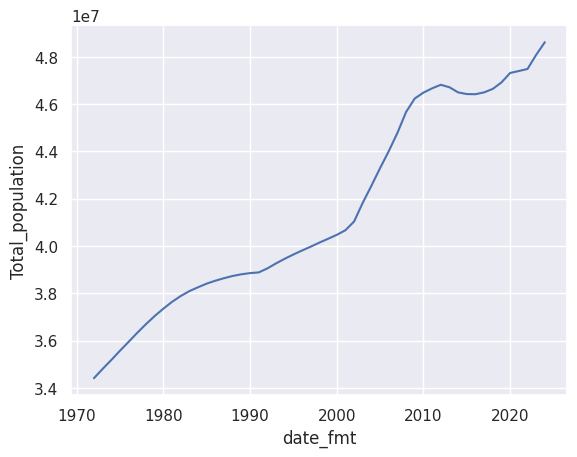

In [64]:
sns.lineplot(data=population_total_chart_data, x='date_fmt', y='Total_population')

- Adding some formatting to the previous Seaborn line chart for Time Series Population figures Spain for the 1972-2025 period.

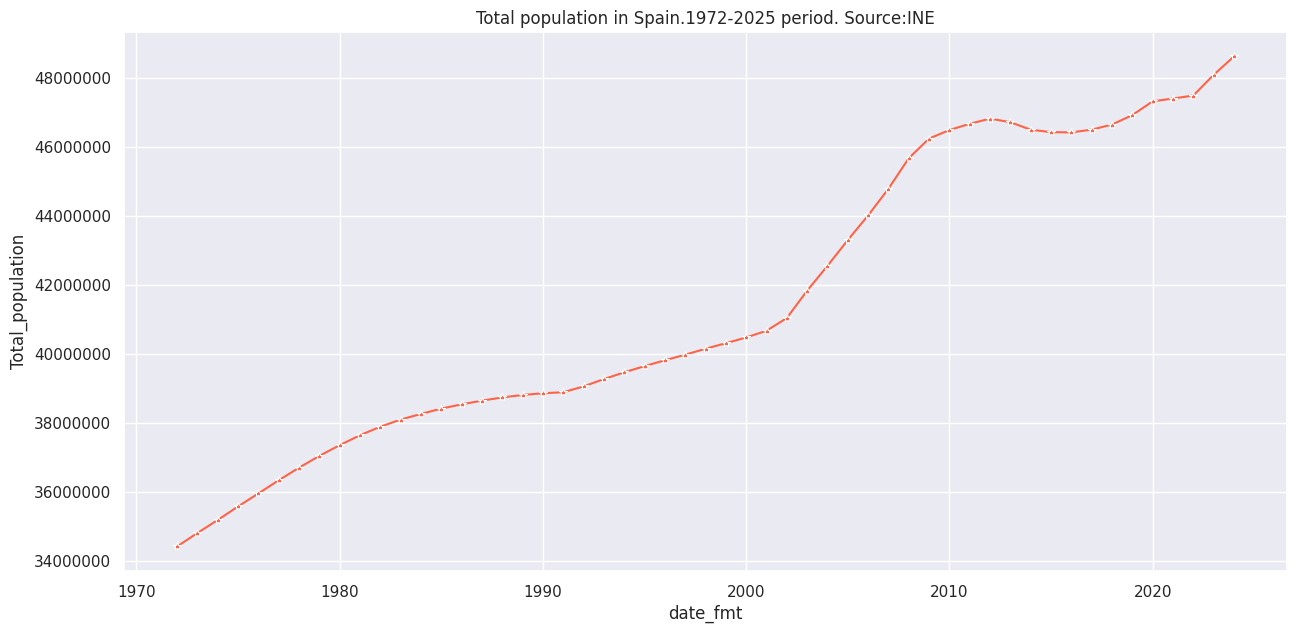

In [ ]:
sns.set(rc={'figure.figsize':(15,7)})
sns.lineplot(data=population_total_chart_data, x='date_fmt', y='Total_population', marker = '*', color = 'tomato').set_title("Total population in Spain.1972-2025 period. Source:INE") 
plt.ticklabel_format(style='plain', axis='y') # This will supress scientific notation

- Finally save preious chart as as a .PNG file

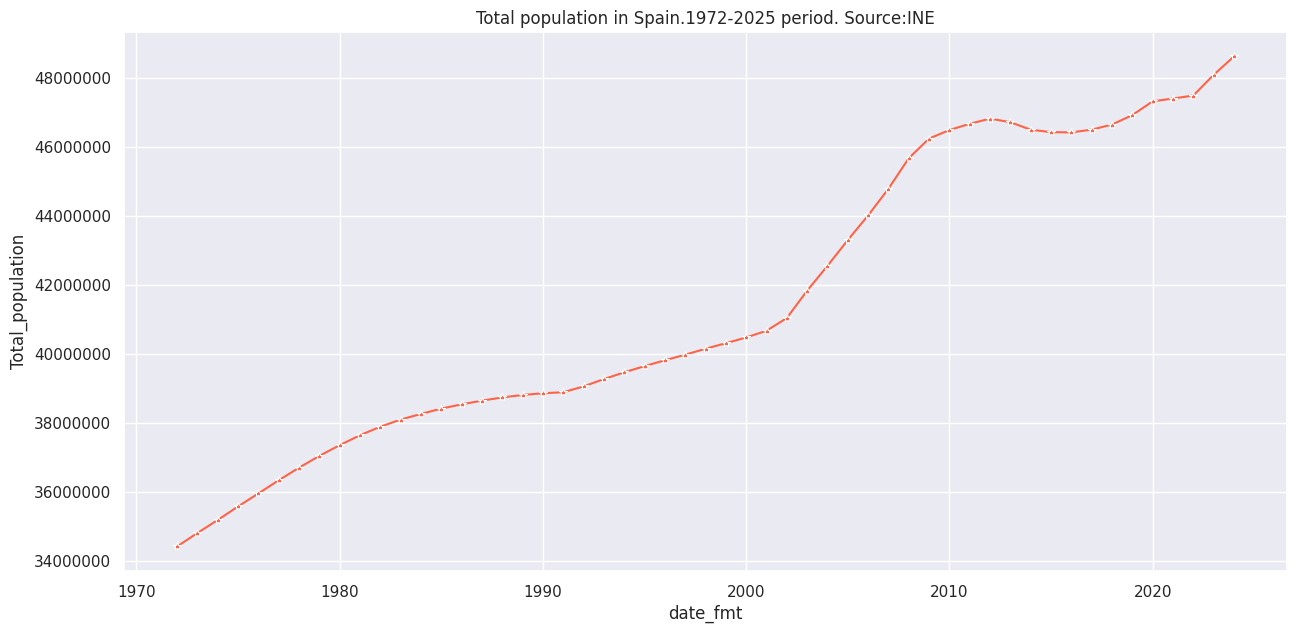

In [ ]:
# Final chart Total population in Spain 1972-2025
sns.set(rc={'figure.figsize':(15,7)})
sns.lineplot(data=population_total_chart_data, x='date_fmt', y='Total_population', marker = '*', color = 'tomato').set_title("Total population in Spain.1972-2025 period. Source:INE") 
plt.ticklabel_format(style='plain', axis='y') # This will supress scientific notation
plt.savefig('Seaborn_gallery/Seaborn_plots/Spain_total_population_1972_2025_period_line_chart.png', bbox_inches='tight') ## This saves the output plot successfully in the project folder
plt.show()